# Introduction:
In the following code we will perform a multiclass classification task on a Stanford car dataset with the help of transfer learning.

## What we will learn?
1. Multi-Class classification
2. Transfer Learning
3. Resnet model architecture
3. Data Augmentation
4. Test time Augmentation
5. Evaluation Metrics
<br>
Precision, Recall, F1-Measure, Confusion Matrix

# Transfer Learning
What is Transfer Learning and what are the benifits of using pretrained models in your code?

**Transfer learning** is a technique in machine learning and deep learning where a model trained on one task is leveraged to improve performance on a related but different task; therefore, instead of starting to bulid the model from scratch and training it on a new task, transfer learning allows you to take advantage of the knowledge already learned by the pre-trained model, which can help reduce the amount of data and computational resources needed to train a new model from scratch. In transfer learning, the knowledge learned from the original task is transferred to the new task, either by using the pre-trained model as a feature extractor or by fine-tuning the pre-trained model on the new task.

Reasons you want to use transfer learning:

**Limited Data**: In real-world and speciallty in medical related tasks obtaining large amounts of labeled data can be costly and time-consuming. For example, in this study, the total amount of labeled data in the datset is 10015 images and even for some classes like Basal cell carcinoma, Actinic keratoses, Vascular lesions, Dermatofibroma, the number of avaible data is much less. Transfer learning can help to overcome this issue by using the knowledge learned from the pre-trained model, which has already been trained on a large dataset.

**Limited Compute Resources**: Training deep neural networks requires a lot of computational resources. By using pre-trained models, you can take advantage of the knowledge already learned by the model and significantly reduce the number of trainable parameters in your model and thus, reduce the amount of computational resources needed to train a new model.

**Improving Generalization**: Transfer learning can help to improve the generalization of models. By using a pre-trained model, which has already learned a wide range of features, you can reduce the risk of overfitting and improve the performance of the model on new, unseen data. Also, transfer learning involves freezing the initial layers of the pre-trained model and training only the final layers on your own data. By doing this, you can ensure that the model retains the general features learned by the pre-trained model, while also adapting to the specific features of your own data.

**Faster Training**: Using a pre-trained model as a starting point can speed up the training process as these models have already been optimized and fine-tuned by experts in the field; therefore, by leveraging the knowledge already learned by the pre-trained model, you can train a new model faster and with less data.

[Reference Link](https://machinelearningmastery.com/transfer-learning-for-deep-learning/)

# Car Classification

Car classification is a common task in computer vision where the goal is to categorize images of cars into different classes based on their make, model, or other characteristics. Here's an outline of steps involved in building our car classification system using deep learning:

## 1. Data Collection
We used a public dataset called Stanford cars dataset. 

## 2. Data Pre-Processing 
Resizing the image to size 400*400, Normalizing pixel values to a range between 0 and 1, Data Augmenting to improve the model generalization

## 3. Model Selection and Building
Choosing a deep learning model architecture suitable for image classification tasks. Common choices include Convolutional Neural Networks (CNNs) like **ResNet**, **VGG**, or **MobileNet**. We can either train the model from scratch or use pre-trained models and fine-tune them on your car dataset. 

## 4. Model Training
After splitting the data into train and test, we train the chosen model on the training set, we evaluate the model's performance on the test set. We also use transfer learning as discussed earlier and use early stopping to improve model efficiency and prevent overfitting.

## 5. Model Evaluation
We evaluate the model's performance on the test sets with metrics such as accuracy, precision, recall, and f1-score.

# Data Collection

We first need to download the dataset (it is uploaded on google drive) and import the required libraries.

In [26]:
download_link = 'https://drive.google.com/uc?id=1nXlURXru6GDwUMPUUkNxfYcc0-UyYHH5'

local_path = 'C:\\Users\\sinaz\\OneDrive\\Desktop\\assignment 1\\car_data\\car_data'

import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
# importing pytorch libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.models as models
import torchvision.transforms as transforms
# importing image required libraries
import time
import os
import PIL.Image as Image
from IPython.display import display
# importing sklearn libraries for evaluation
from sklearn.metrics import confusion_matrix, classification_report
# to check the availability of GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
print(torch.cuda.get_device_name(device))

cuda
NVIDIA GeForce RTX 4050 Laptop GPU


## Going through the dataset

Checking the number of each car we have in our dataset

In [49]:
# creating a dictionary of the classes and counting the number of images in each class by iterating through the folders
car_count_dict = {}
for folder_name in os.listdir(os.path.join(local_path, 'train')):
    count = len(os.listdir(os.path.join(local_path, 'train', folder_name)))
    car_count_dict[folder_name] = count

for folder_name in os.listdir(os.path.join(local_path, 'test')):
    count = len(os.listdir(os.path.join(local_path, 'test', folder_name)))
    car_count_dict[folder_name] += count



Plotting the number of each car in each class

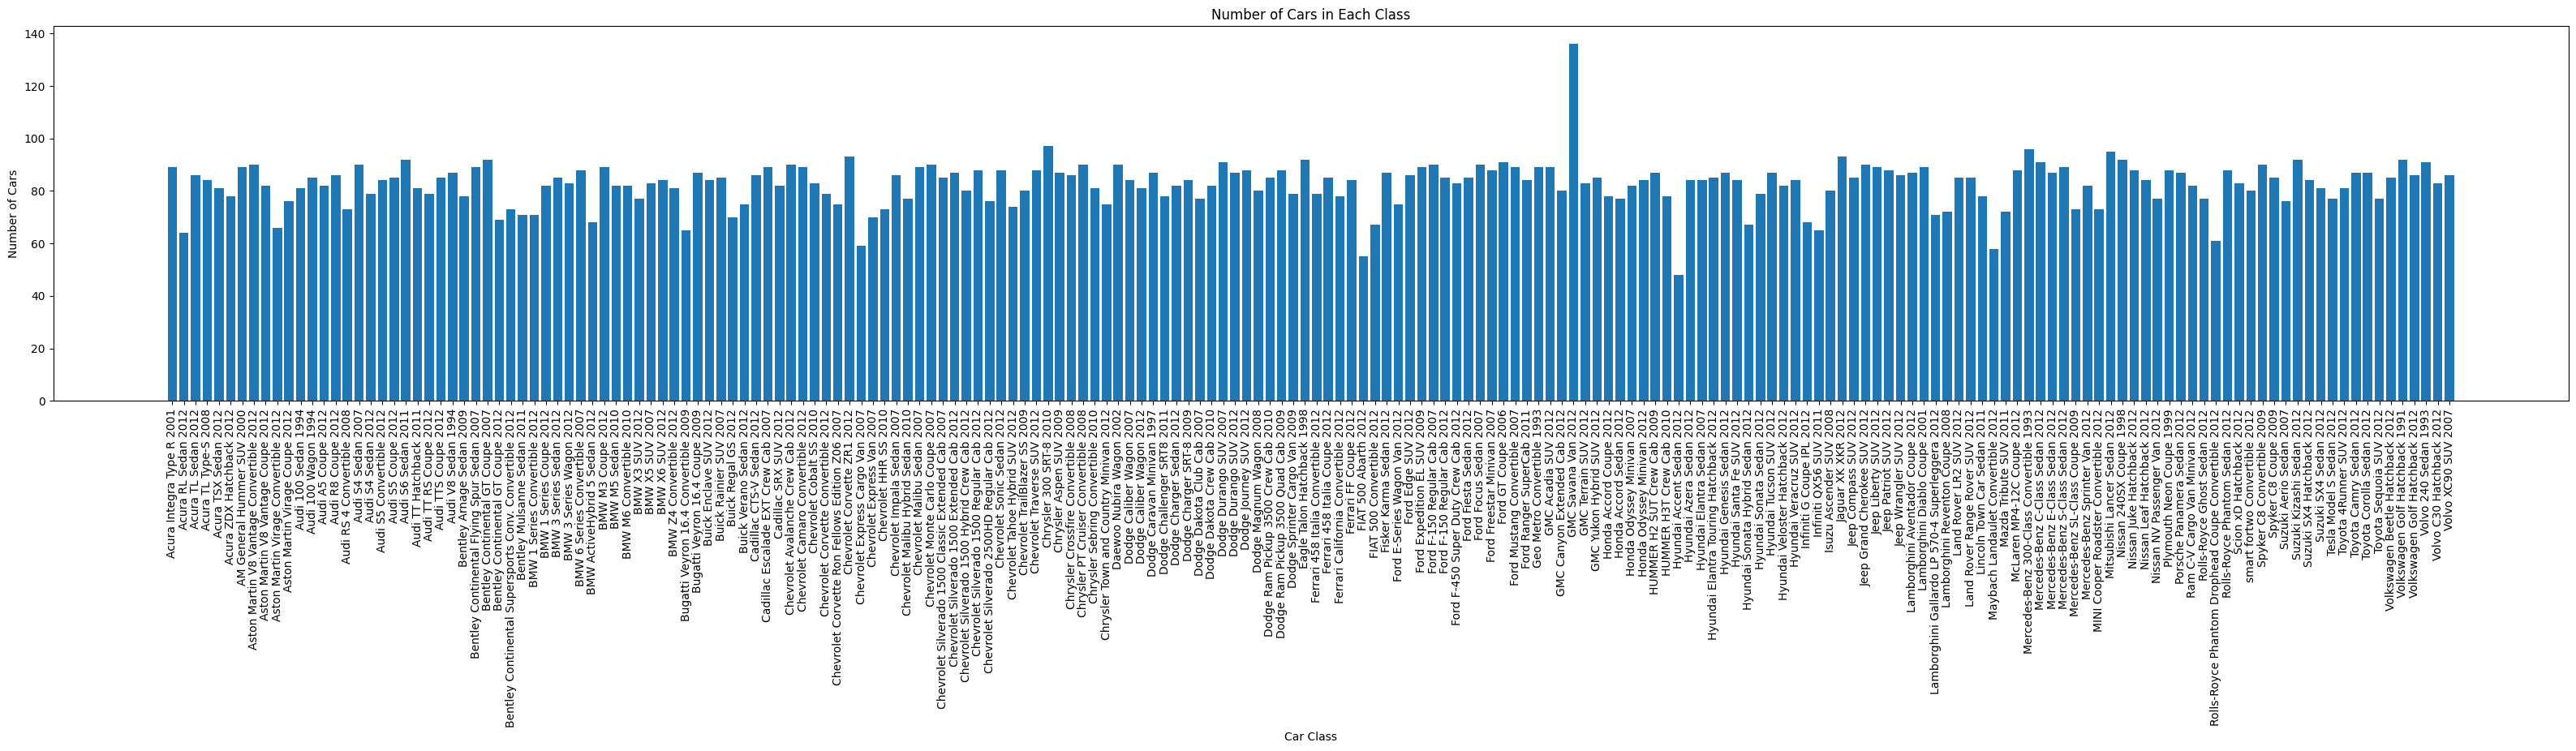

In [50]:
plt.figure(figsize=(40, 6))
    # Create a bar chart
plt.bar(car_count_dict.keys(), car_count_dict.values())

# Add labels and title
plt.xlabel('Car Class')
plt.ylabel('Number of Cars')
plt.title('Number of Cars in Each Class')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Display the histogram
plt.show()

# Data Preprocessing and Data augmentation
Using transforms libraries to perform preprocessing and data augmentation techniques such as resizing, rotation, flipping, and normalizing

It is important to note that we do not perform augmentations like flip and rotation on the test dataset as we want to maintain the integrity of the test dataset

In [139]:
dataset_dir = local_path
# defining the transformation for the dataset
train_tfms = transforms.Compose([transforms.Resize((400, 400)),
                                transforms.RandomHorizontalFlip(),
                                transforms.RandomRotation(15),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
test_tfms = transforms.Compose([transforms.Resize((400, 400)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

test_time_tfms = transforms.Compose([transforms.Resize((400, 400)),
                                transforms.ToTensor(),
                                transforms.RandomRotation(90),
                                transforms.RandomHorizontalFlip(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# defining the dataset from the image folder 
# Here we use the folder names themselves as the class names
train_dataset = torchvision.datasets.ImageFolder(root=os.path.join(dataset_dir, 'train'), transform = train_tfms)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = 32, shuffle=True, num_workers = 2)

test_dataset = torchvision.datasets.ImageFolder(root=os.path.join(dataset_dir, 'test'), transform = test_tfms)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size = 32, shuffle=False, num_workers = 2)

# Model Creation and Transfer Learning

So here we use **Resnet34** as our model and get the pretrained model. ResNet-34 is a convolutional neural network architecture that belongs to the ResNet (Residual Network) family. It is specifically designed for image classification tasks and is characterized by its deep structure with skip connections or residual connections. Here's why ResNet-34 might be used for car classification:

**Deep Architecture**: ResNet-34 consists of 34 layers, making it deeper than earlier CNN architectures like AlexNet or VGG. Deeper networks have been shown to capture more complex features, which can be beneficial for tasks like car classification where distinguishing features may be intricate.

**Skip Connections**: ResNet introduces skip connections, also known as residual connections, which enable the network to learn residual mappings instead of directly trying to learn the underlying mapping. This helps alleviate the vanishing gradient problem and allows for easier training of deeper networks. In the context of car classification, these skip connections can help the network effectively capture both fine and coarse details in car images.

**Pre-trained Models**: Pre-trained versions of ResNet-34 are available, trained on large-scale image datasets like ImageNet. These pre-trained models can be fine-tuned on smaller car datasets for specific classification tasks. Transfer learning from pre-trained models helps accelerate training and often leads to better performance, especially when training data is limited.

**Efficiency**: Despite its depth, ResNet-34 is computationally efficient compared to deeper variants like ResNet-50 or ResNet-101. This efficiency makes it practical for training on moderate hardware setups, making it accessible for a wide range of users interested in car classification tasks.

**Proven Performance**: ResNet-34 has been widely used and studied in various image classification tasks, demonstrating state-of-the-art performance on benchmarks like ImageNet. Its effectiveness in handling complex visual data makes it a suitable candidate for car classification, where accurate identification of car make, model, or features is crucial.

The architecture of Resnet34 is as the following:

![Resnet34 Architecture](https://editor.analyticsvidhya.com/uploads/38371XTo6Q.png)

[Reference link](https://www.analyticsvidhya.com/blog/2021/09/building-resnet-34-model-using-pytorch-a-guide-for-beginners/)

Here we are using the resnet34 model from the torchvision.models library. We are using the pretrained model and replacing
the last fully connected layer with a new one.

In [140]:
model = models.resnet34(pretrained=True)
num_ftrs = model.fc.in_features
# getting the number of classes in the dataset
no_classes = len(train_dataset.classes)
# showing the architecture of the model
model.parameters

c:\Users\sinaz\.conda\envs\test\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\sinaz\.conda\envs\test\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


<bound method Module.parameters of ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)


In [156]:
# replace the last fc layer with an untrained one based on the number of classes we have in our dataset (requires grad by default)
model.fc = nn.Linear(num_ftrs, no_classes)
model = model.to(device)

# defining the loss function and the optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

"""
Here we will use learning rate schedular to change the learning rate while training our model. We are tracking the training accuracy
and measuring whether it increases by atleast 0.9 per epoch and if it hasn't increased by 0.9 reduce the learning by 0.1x.
However in this model it did not benefit me.
"""
lrscheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', patience=3, threshold = 0.9)

### Learning Rate Schedular (Reduce Learning Rate on Plateau)

Reduce learning rate when a metric has stopped improving. Models often benefit from reducing the learning rate by a factor of 2-10 once learning stagnates. This scheduler reads a metrics quantity and if no improvement is seen for a ‘patience’ number of epochs, the learning rate is reduced.
[Reference Link](https://pytorch.org/docs/stable/generated/torch.optim.lr_scheduler.ReduceLROnPlateau.html)

# Evaluation Step

Here we define the evaluation step for validation of our model while training the model. Here our metric is the accuracy of the prediction. We also added test time augmentation to our model.

What is **Test time augmentation**?

Test time augmentation (TTA) is a method used during the testing phase of machine learning models, particularly in computer vision tasks. It involves applying various data augmentation techniques to test images, such as rotations, flips, and color adjustments, to generate multiple augmented versions of each image. These augmented versions are then used to make predictions, and the final prediction for each image is often obtained by averaging the predictions made on all the augmented versions. TTA helps improve model performance by providing the model with multiple views of each test image, making its predictions more robust and less sensitive to variations in the input data. 
[Reference Link](https://towardsdatascience.com/test-time-augmentation-tta-and-how-to-perform-it-with-keras-4ac19b67fb4d)

In [157]:
import torch
from tqdm import tqdm

def eval_model(model, test_loader, device, test_time_tsfm=None, num_augmentations=1):
    correct = 0.0
    total = 0.0
    with torch.no_grad():
        # Iterate over the test data and generate predictions.
        for i, data in tqdm(enumerate(test_loader, 0)):
            # Get inputs
            images, labels = data
            # Transfer to GPU
            images = images.to(device)
            labels = labels.to(device)
            # If test time augmentation is provided, apply transformations
            if test_time_tsfm is not None:
                augmented_images = []
                for img in images:
                    augmented_images.extend(img)
                    # Apply the transformation num_augmentations times
                    augmented_imgs = [test_time_tsfm(img) for _ in range(num_augmentations)]
                    # Stack the augmented images into a single tensor and add to the list
                    augmented_images.extend(augmented_imgs)
                # Convert the list of augmented images to a single tensor
                images = torch.stack(augmented_images)

            # Forward pass
            outputs = model(images)
            # Get predictions from the maximum value 
            _, predicted = torch.max(outputs.data, 1)
            # Total number of labels in the test data set
            total += labels.size(0) * num_augmentations
            # Total correct predictions
            correct += (predicted == labels.repeat(num_augmentations)).sum().item()
    # Calculate the accuracy
    test_acc = 100.0 * correct / total
    print('Accuracy of the network on the test images: %d %%' % (
        test_acc))
    return test_acc

# Training Step

Here we define the train function to call it later and train the model. 

In [158]:
def train_model(model, train_loader, test_loader, criterion, optimizer, scheduler, device, n_epochs = 5):
    # keeping track of losses and the accuracies
    losses = []
    accuracies = []
    test_accuracies = []
    # set the model to train mode initially (This is important as some models behave differently in train and test time.
    model.train()
    # loop over the epochs
    for epoch in tqdm(range(n_epochs)):
        # keep track of the time for training the model for each epoch
        since = time.time()
        running_loss = 0.0
        running_correct = 0.0
        # iterate over the training data
        for i, data in tqdm(enumerate(train_loader, 0)):
            # get the inputs and assign them to cuda
            inputs, labels = data
            # Transfer to GPU
            inputs = inputs.to(device)
            labels = labels.to(device)
            # zero the parameter gradients
            optimizer.zero_grad()
            # forward pass
            outputs = model(inputs)
            # get the predictions
            _, predicted = torch.max(outputs.data, 1)
            # calculate the loss
            loss = criterion(outputs, labels)
            # backward pass
            loss.backward()
            # optimize the weights
            optimizer.step()
            # calculate the loss
            running_loss += loss.item()
            # calculate the accuracy
            running_correct += (labels==predicted).sum().item()
        # calculate the duration for each epoch
        epoch_duration = time.time()-since
        epoch_loss = running_loss/len(train_loader)
        epoch_acc = 100/32*running_correct/len(train_loader)
        print("Epoch %s, duration: %d s, loss: %.4f, acc: %.4f" % (epoch+1, epoch_duration, epoch_loss, epoch_acc))
        # append the losses and the accuracies
        losses.append(epoch_loss)
        accuracies.append(epoch_acc)
        # switch the model to eval mode to evaluate on test data
        model.eval()
        test_acc = eval_model(model, test_loader, device)
        test_accuracies.append(test_acc)
        # re-set the model to train mode after validating
        model.train()
        scheduler.step(test_acc)
        since = time.time()
    print('Finished Training')
    return model, losses, accuracies, test_accuracies

This is where we call the function to start training the model

In [159]:
n_epochs = 10
# train the model
model, training_losses, training_accs, test_accs = train_model(model, train_loader, 
                            test_loader, criterion, optimizer, lrscheduler, device, n_epochs=n_epochs)
# Save the model
torch.save(model.state_dict(), 'model.pth')

255it [01:54,  2.23it/s]0:00<?, ?it/s]


Epoch 1, duration: 117 s, loss: 1.3537, acc: 75.2574


252it [00:43,  5.75it/s]
 10%|█         | 1/10 [02:44<24:40, 164.52s/it]

Accuracy of the network on the test images: 83 %


255it [01:54,  2.22it/s]


Epoch 2, duration: 117 s, loss: 0.2017, acc: 96.0539


252it [00:43,  5.75it/s]
 20%|██        | 2/10 [05:29<21:57, 164.69s/it]

Accuracy of the network on the test images: 86 %


255it [01:55,  2.22it/s]


Epoch 3, duration: 118 s, loss: 0.1292, acc: 97.1814


252it [00:44,  5.62it/s]
 30%|███       | 3/10 [08:15<19:18, 165.45s/it]

Accuracy of the network on the test images: 86 %


184it [01:23,  2.20it/s]
 30%|███       | 3/10 [09:42<22:40, 194.32s/it]


KeyboardInterrupt: 

Now we plot the training and validation results

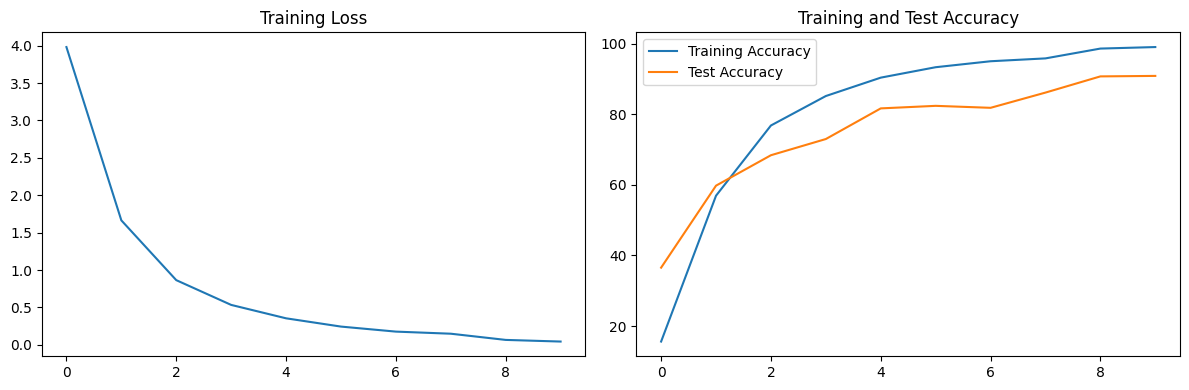

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot training loss
axs[0].plot(training_losses)
axs[0].set_title("Training Loss")

# Plot training and test accuracy
axs[1].plot(training_accs, label="Training Accuracy")
axs[1].plot(test_accs, label="Test Accuracy")
axs[1].set_title("Training and Test Accuracy")
axs[1].legend()

plt.tight_layout()
plt.show()


# Test Time Evaluation Step
Now we want to start evaluating the model and we need to find the index of each image class first.

In [160]:
# tieing the class indices to their names
def find_classes(dir):
    classes = os.listdir(dir)
    classes.sort()
    class_to_idx = {classes[i]: i for i in range(len(classes))}
    return classes, class_to_idx
classes, c_to_idx = find_classes(os.path.join(dataset_dir, 'train'))

Now we est the model performance on random images

In [161]:
""" we can load the saved model from training if we only want to test it without training it again
"""
# model = models.resnet34(pretrained=True)
# model.load_state_dict(torch.load('model.pth'))
# model.eval()

# switch the model to evaluation mode to make dropout and batch norm work in eval mode
model.eval()

""" 
transforms for the input image (this is not the test loader) This is just for a single image to be the same size and
normalized as the test loader 
"""
loader = transforms.Compose([transforms.Resize((400, 400)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

random_image_name = 'Aston Martin V8 Vantage Convertible 2012/00239.jpg'
image = Image.open(os.path.join(dataset_dir, 'test', random_image_name))
# display the image to be predicted 
image = loader(image).float()
image = torch.autograd.Variable(image, requires_grad=True)
# add a dimension to the image to make it a batch of 1 image to feed it to the model for prediction
image = image.unsqueeze(0)
image = image.cuda()
output = model(image)
# get the class indices from the model 
# conf represents the highest probability or confidence score among all the predicted classes for the given input image.
conf, predicted = torch.max(output.data, 1)

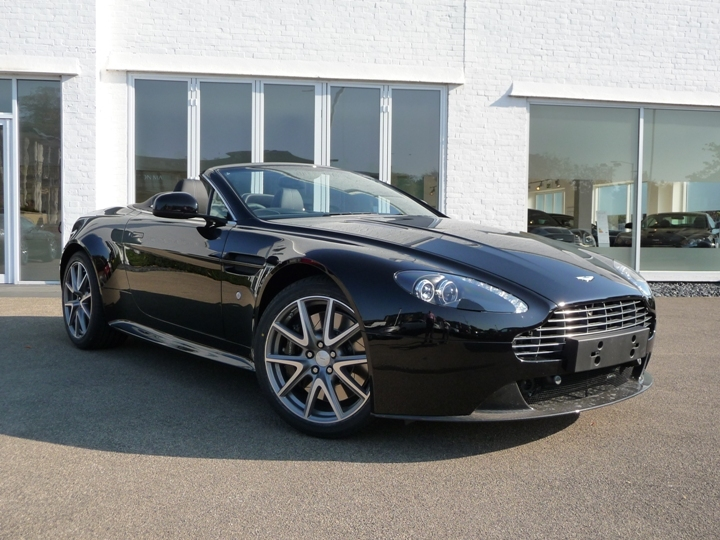

Aston Martin V8 Vantage Convertible 2012 confidence:  14.344629287719727


In [162]:
display(Image.open(os.path.join(dataset_dir, 'test', random_image_name)))
print(classes[predicted.item()], "confidence: ", conf.item())

# Evaluation Metrics calculation
Precision, Recall, F1-Measure are calculated here.

### Precision: 
Precision measures the accuracy of positive predictions made by the model. It is the ratio of true positive predictions to the total number of positive predictions made by the model. Precision focuses on the relevance of the model's positive predictions.
<br>
Precision = TP / (TP + FP)
<br>
Where:
<br>
TP (True Positives) is the number of correctly predicted positive instances.
FP (False Positives) is the number of incorrectly predicted positive instances.

### Recall:
Recall, also known as sensitivity or true positive rate, measures the model's ability to identify all positive instances in the dataset. It is the ratio of true positive predictions to the total number of actual positive instances in the dataset. Recall focuses on the completeness of the model's predictions.
<br>
Recall = TP / (TP + FN)
<br>
Where:
<br>
FN (False Negatives) is the number of incorrectly predicted negative instances.

### F1-measure:
F1-measure is the harmonic mean of precision and recall. It provides a single score that balances both precision and recall. F1-measure is particularly useful when the class distribution is imbalanced, as it takes both false positives and false negatives into account.
<br>
F1-measure = 2 * (Precision * Recall) / (Precision + Recall)

### Confusion Matrix:
A confusion matrix is a table that summarizes the performance of a classification model. It presents the actual and predicted classes in a tabular format, where each cell of the matrix represents the count of instances classified into a particular combination of actual and predicted classes. A confusion matrix helps visualize the model's performance by highlighting the true positive, true negative, false positive, and false negative predictions.

[Reference Link](https://towardsdatascience.com/performance-metrics-confusion-matrix-precision-recall-and-f1-score-a8fe076a2262)

The important thing to note here is that we need to calculate these results for each class in our dataset.

In [ ]:
# Create empty lists to store the true labels and predicted labels
true_labels = []
predicted_labels = []

# Iterate over the test_loader and generate predictions
with torch.no_grad():
    for images, labels in test_loader:
        # Transfer the images and labels to the device
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        
        # Get the predicted labels from the maximum value
        _, predicted = torch.max(outputs.data, 1)
        
        # Append the true labels and predicted labels to the lists
        true_labels.extend(labels.cpu().numpy())
        predicted_labels.extend(predicted.cpu().numpy())

# Generate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Generate the classification report
cr = classification_report(true_labels, predicted_labels)

# Print the confusion matrix and classification report
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(cr)


Confusion Matrix:
[[31  0  0 ...  0  0  0]
 [ 0 18  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0 15  0]
 [ 0  0  0 ...  0  0 15]]

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.70      0.68        44
           1       0.90      0.41      0.56        44
           2       0.00      0.00      0.00        32
           3       0.35      0.37      0.36        43
           4       0.19      0.55      0.29        42
           5       0.50      0.17      0.26        40
           6       0.46      0.67      0.55        39
           7       0.27      0.07      0.11        45
           8       0.05      0.93      0.09        41
           9       1.00      0.03      0.06        33
          10       0.35      0.58      0.44        38
          11       0.57      0.10      0.17        40
          12       1.00      0.02      0.05        42
          13       0.00      0.00      0.00  

c:\Users\sinaz\.conda\envs\test\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\sinaz\.conda\envs\test\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\sinaz\.conda\envs\test\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Final Note:** We used LLMs including ChatGPT for some of the comments and content generations in this notebook